In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import nibabel as nb
import hrf_tools
import hcp_utils as hcp
from analysis import plot_59k_results

import matplotlib.pyplot as plt


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
subject=100610
feature='rms'
n_movies=4
scaler = StandardScaler()

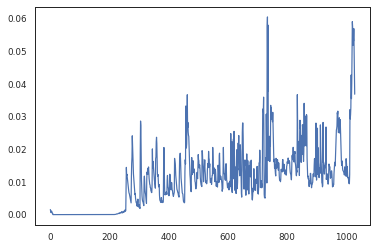

In [3]:
stim = ['tfMRI_MOVIE1_7T_AP','tfMRI_MOVIE2_7T_PA','tfMRI_MOVIE3_7T_PA','tfMRI_MOVIE4_7T_AP']
stim_feat = ['7T_MOVIE1_CC1_v2', '7T_MOVIE2_HO1_v2', '7T_MOVIE3_CC2_v2', '7T_MOVIE4_HO2_v2']
    
i=2
X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
plt.plot(X[7910:8940])

Text(0, 0.5, 'rms value')

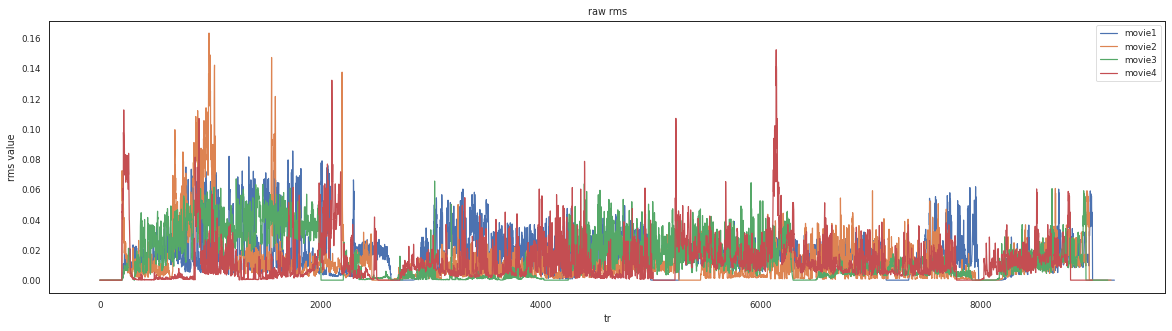

In [4]:
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('raw rms')
plt.xlabel('tr')
plt.ylabel('rms value')

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('hrf convolved rms')
plt.xlabel('tr')
plt.ylabel('rms value')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-7b5432a4c5d2>", line 7, in <module>
    X = X[:Y.shape[0],:] # if it has one extra value
NameError: name 'Y' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/minic

TypeError: object of type 'NoneType' has no len()

<Figure size 1440x360 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in np.arange(n_movies):
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    
    X = scaler.fit_transform(X)
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value
    
    plt.plot(X, label=f'movie{str(i+1)}')
    plt.legend()
plt.title('standard scaled then hrf convolved rms')
plt.xlabel('tr')
plt.ylabel('rms value')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[0.11087047 0.11486528 0.16020068 ... 0.98310014 0.98855824 0.99438171]
[0.14800988 0.16985074 0.17875454 ... 0.98733303 0.99178168 0.99777462]
[0.11087047 0.11486528 0.16020068 ... 0.98310014 0.98855824 0.99438171]
[0.14800988 0.16985074 0.17875454 ... 0.98733303 0.99178168 0.99777462]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


KeyboardInterrupt: 

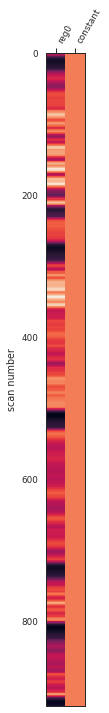

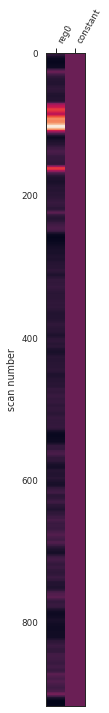

In [6]:
stim = ['tfMRI_MOVIE1_7T_AP','tfMRI_MOVIE2_7T_PA','tfMRI_MOVIE3_7T_PA','tfMRI_MOVIE4_7T_AP']
stim_feat = ['7T_MOVIE1_CC1_v2', '7T_MOVIE2_HO1_v2', '7T_MOVIE3_CC2_v2', '7T_MOVIE4_HO2_v2']
    
for i in np.arange(n_movies):
        
    im_file = f'../sourcedata/data/HCP_7T_movie_FIX/brain/HCP_7T_movie_FIX/100610/MNINonLinear/Results/{stim[i]}/{stim[i]}_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries.nii'
    img = nb.load(im_file)
    img_y = img.get_fdata()
    Y = img_y
    #Y = scaler.fit_transform(img_y)
    #load feature
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    X = scaler.fit_transform(X)
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value

    n_scans = Y.shape[0]
    frame_times= np.arange(n_scans)

    from nilearn.glm.first_level import make_first_level_design_matrix
    design_matrix = make_first_level_design_matrix(frame_times, None,
                              add_regs=X, hrf_model=None, drift_model=None)

    from nilearn.plotting import plot_design_matrix
    plot_design_matrix(design_matrix)

    from nilearn.glm.first_level import run_glm
    labels,results = run_glm(Y,design_matrix.values)

    from nilearn.glm.contrasts import compute_contrast
    contrast = compute_contrast(labels=labels, \
                                regression_result=results, \
                                con_val=np.array([1,0]).T, \
                                contrast_type='t')
    vertex_info = hcp.get_HCP_vertex_info(img)
    #from analysis import plot_59k_results
    plot_59k_results(contrast.z_score(),'z',vertex_info,subject,feature,f'glm_movie{i+1}_scaled_rawY')
    #plot_59k_results(contrast.p_value(),'p',vertex_info,subject,feature,'glm1run_p')
    #plot_59k_results(contrast.effect_size(),'d',vertex_info,subject,feature,'glm1run_d')

## Compare to Encoding model

In [11]:
stim = ['tfMRI_MOVIE1_7T_AP','tfMRI_MOVIE2_7T_PA','tfMRI_MOVIE3_7T_PA','tfMRI_MOVIE4_7T_AP']
stim_feat = ['7T_MOVIE1_CC1_v2', '7T_MOVIE2_HO1_v2', '7T_MOVIE3_CC2_v2', '7T_MOVIE4_HO2_v2']
from analysis import simple_ridgeCV

for i in [2,3]:
    im_file = f'../sourcedata/data/HCP_7T_movie_FIX/brain/HCP_7T_movie_FIX/100610/MNINonLinear/Results/{stim[i]}/{stim[i]}_Atlas_1.6mm_MSMAll_hp2000_clean.dtseries.nii'
    img = nb.load(im_file)
    img_y = img.get_fdata()
    Y = scaler.fit_transform(img_y)
    #load feature
    X = np.load(f'../sourcedata/data/HCP_7T_movie_FIX/features/{stim_feat[i]}_rms.npy')
    X = scaler.fit_transform(X)
    X = hrf_tools.apply_optimal_hrf_10hz(X,10)
    X = hrf_tools.resample_1hz(X)
    X = X[:Y.shape[0],:] # if it has one extra value

    vertex_info = hcp.get_HCP_vertex_info(img)
    #from analysis import plot_59k_results
    
    scores_mean,corr_mean,weights_mean = simple_ridgeCV(X,Y)
    
    plot_59k_results(scores_mean,'r2',vertex_info,subject,feature,f'encoding_movie{i+1}_scaled')
    #plot_59k_results(contrast.p_value(),'p',vertex_info,subject,feature,'glm1run_p')
    #plot_59k_results(contrast.effect_size(),'d',vertex_info,subject,feature,'glm1run_d')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[-2.86305628 -2.69955414 -2.64854855 ...  1.54712941  1.54823802
  1.71944777]
[-2.43716498 -2.33481828 -2.10104274 ...  1.64543538  1.70068779
  1.74560489]
[-2.86305628 -2.69955414 -2.64854855 ...  1.54712941  1.54823802
  1.71944777]
[-2.43716498 -2.33481828 -2.10104274 ...  1.64543538  1.70068779
  1.74560489]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data
[-0.82762725 -0.80286727 -0.80096204 ...  0.93422081  0.94316647
  0.95820545]
[-0.80991465 -0.76027451 -0.75820489 ...  1.35267912  1.44147372
  1.53515266]
[-0.82762725 -0.80286727 -0.80096204 ...  0.93422081  0.94316647
  0.95820545]
[-0.80991465 -0.76027451 -0.75820489 ...  1.35267912  1.44147372
  1.53515266]
